<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/GGSS_TADL_Optimisation_practical_1_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions

In [2]:
def scaled_quadratic(a, grad=False, hess=False):
  assert (a>0), 'Parameter a must be strictly positive'

  def objfun(x, grad=grad, hess=hess):
    f = (a*np.square(x[0]) + np.square(x[1])) / 2

    if grad:
      g = np.array([a*x[0], x[1]])

    if hess:
      H = np.array([[a, 0], [0, 1]])
    
    if hess and grad:
      return f,g,H

    elif grad:
      return f,g

    else:
      return f

  return objfun


In [4]:
def rosenbrock(x, grad=False, hess=False):
  a=10

  f = a*(x[1]-x[0]**2)**2 + (x[0]-1)**2

  if grad:
    g = np.array([2*(x[0]-1) - 4*a*x[0] * (x[1]-x[0]**2), 2*a*(-x[0]**2 + x[1])])

  if hess:
    H = np.array([[2 + 12*a*x[0]**2 - 4*a*x[1], -4*a*x[0]],[-4*a*x[0], 2*a]])
  
  if hess and grad:
    return f,g,H

  elif grad:
    return f,g

  else:
    return f


# Question 1

In [5]:
test_func = 'scaled_quadratic'


if test_func == 'scaled_quadratic':
  a = 10
  objfun = scaled_quadratic(a)
  x = np.array([1,a])
  xmin = np.array([0,0])

elif test_func == 'rosenbrock':
  objfun = rosenbrock;
  x = np.array([-1, 0.8])
  # x = np.array([-1.2, 1])
  # x = np.array([0.4, 0.2])
  xmin = np.array([1,1]); # true minimiser

nhistory = 10

# True info
fmin, gmin, Hmin = objfun(xmin, grad=True, hess=True) # true minimum
kappa = np.linalg.cond(Hmin)

# Solver settings
max_iterations = 800
tol_g = 1e-5 # termination condition ||gradient|| <= tol
alpha0 = 1 #initial step length
tau = 0.5 #backtracking parameter
beta = 0.001 #for Armijo condition

# Useful data to see progress of solver
n = np.size(x)
xs = np.zeros((max_iterations+1, n)) # iterate
fs = np.zeros((max_iterations+1,1)) # objective value at each iteration
norm_gs = np.zeros((max_iterations+1,1)) # ||gradient|| at each iteration

# Set initial data
xs[0,:] = x
f, g = objfun(x, grad=True)
fs[0,:] = f;
norm_gs[0,:] = np.linalg.norm(g);

k = 1
print('  k  |  f(xk)       |  ||grad|| \n')
print('--------------------------------\n')
print(f"{k-1}  |  {f}  |  {np.linalg.norm(g)} ")
while (k <= max_iterations) and (np.linalg.norm(g) >= tol_g):
    s = -g # steepest descent direction
    #  Backtracking Armijo linesearch
    alpha = alpha0
    xtest = x + alpha*s
    while objfun(xtest) > f + beta*alpha* (g.transpose() @ s):
        alpha = tau*alpha
        xtest = x + alpha*s
    x = xtest
    f, g = objfun(x, grad=True)
    if k % 10 == 0:
        print(f"{k}  |  {f}  |  {np.linalg.norm(g)} ")
    # Save info
    xs[k,:] = x
    fs[k,:] = f
    norm_gs[k,:] = np.linalg.norm(g)
    k += 1

print(f"{k-1}  |  {f}  |  {np.linalg.norm(g)} ")
print(f'Finished after {k-1} iterations')
xs = xs[:k-1, :]
fs = fs[:k-1, :]
norm_gs = norm_gs[:k-1, :]
xdists = np.zeros((k-1,1))
for i in range(k-1):
    xdists[i] = np.linalg.norm(xs[i,:] - xmin)

# Check asymptotic order of convergence
if np.size(fs) < nhistory:
    asym_fs = np.squeeze(fs)
else:
    asym_fs = np.squeeze(fs[-nhistory:])

fit_fs = np.polyfit(np.log(asym_fs[:-1]), np.log(asym_fs[1:]), 1)
print(f'Objective values converge with order {fit_fs[0]}')

  k  |  f(xk)       |  ||grad|| 

--------------------------------

0  |  55.0  |  14.142135623730951 
10  |  0.3122647150685509  |  1.3753485053251908 
20  |  0.0021610529682823195  |  0.14886293391260413 
30  |  8.091521503657882e-06  |  0.0048123700922291885 
40  |  8.922692090436482e-08  |  0.0008219708581337481 
50  |  6.868770376644735e-10  |  9.150559578437694e-05 
57  |  8.580662237034187e-12  |  5.0805968735632245e-06 
Finished after 57 iterations
Objective values converge with order 0.9590634723675073


(30, 30) (30, 30) (30, 30)
rho_SD convergence rate <= 0.6694214876033059 (from kappa = 10.0)


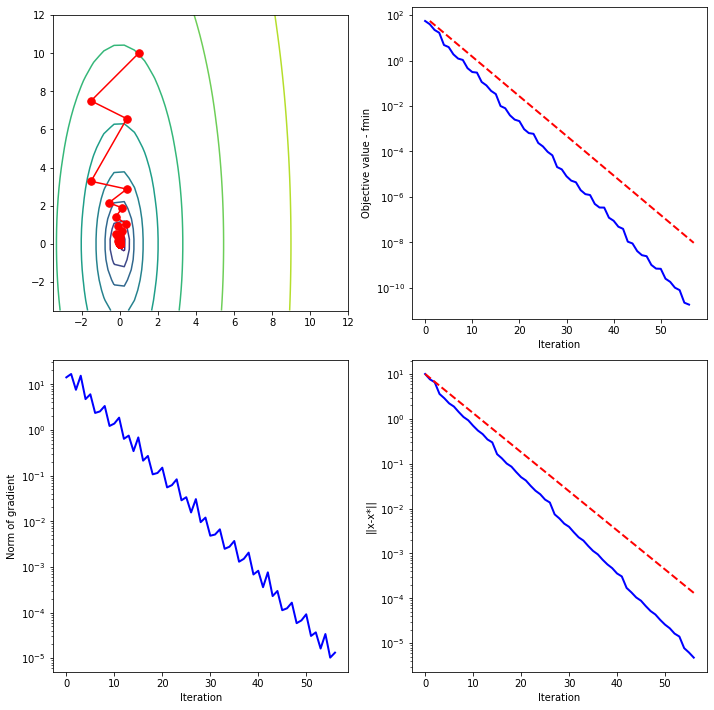

In [6]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
npts = 30
xplt = np.linspace(np.min(xs)-2, np.max(xs)+2, npts)
yplt = xplt
X, Y = np.meshgrid(xplt, yplt)
Z = np.zeros((npts, npts))
for i in range(npts):
  for j in range(npts):
    Z[i,j] = np.log(objfun(np.array([X[i,j], Y[i,j]])))

print(X.shape, Y.shape, X.shape)

axs[0,0].contour(X, Y, Z)
axs[0,0].set_aspect('equal', 'box')
axs[0,0].plot(xs[:,0], xs[:,1], 'r.-', markersize=15)


axs[0,1].semilogy(fs-fmin, 'b-', linewidth=2)
axs[0,1].set_xlabel('Iteration')
axs[0,1].set_ylabel('Objective value - fmin')
rho = ((kappa-1)/(kappa+1))**2
print(f"rho_SD convergence rate <= {rho} (from kappa = {kappa})")
axs[0,1].semilogy(np.arange(1,fs.size+1),(fs[0]-fmin)*(np.power(rho, np.arange(fs.size))), 'r--', linewidth=2)


axs[1,0].semilogy(norm_gs, 'b-', linewidth=2)
axs[1,0].set_xlabel('Iteration')
axs[1,0].set_ylabel('Norm of gradient')

axs[1,1].semilogy(xdists, 'b-', linewidth=2);
axs[1,1].set_xlabel('Iteration');
axs[1,1].set_ylabel('||x-x*||');
xs_rate = np.zeros((xdists.size,1))
xs_rate[0] = xdists[0]
for i in range(1,xdists.size):
    xs_rate[i] = (a-1)/(a+1) * xs_rate[i-1];
   
axs[1,1].semilogy(xs_rate, 'r--', linewidth=2);

plt.tight_layout(1.0)